In [1]:
import time

import pylab as pl

from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import euclidean_distances

import math
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import adjusted_rand_score

from scipy.spatial import ConvexHull,convex_hull_plot_2d

from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
#local path where the data locates, change it to your local path
record= pd.read_csv("/Users/brycechinn/Desktop/Research/data/CS_21Jan27.csv")

In [3]:
col=['Time_Seen','Species','Latitude','Longitude','Media']

In [4]:
record.columns = col
record['Time_Seen'] = pd.to_datetime(record.Time_Seen,utc=True).copy()
record['Month'] = record.Time_Seen.dt.month
record['Hour'] = record.Time_Seen.dt.hour
record['Year'] = record.Time_Seen.dt.year

In [5]:
#king county boundaries
maxLat = 47.7763
minLat = 47.1878
maxLon = -121.0941
minLon = -122.5346

In [6]:
rec19 = record[record.Year == 2019]

In [7]:
rec20 = record[record.Year == 2020]

In [8]:
rec19_coyo = rec19[rec19.Species == 'Coyote']
rec20_coyo = rec20[rec20.Species == 'Coyote']

In [9]:
rec19_coyo = rec19_coyo.drop(['Time_Seen','Species','Month','Hour','Year','Media'],axis=1)
rec20_coyo = rec20_coyo.drop(['Time_Seen','Species','Month','Hour','Year','Media'],axis=1)

In [10]:
rec19_king = rec19_coyo[(rec19_coyo['Latitude']>minLat)&(rec19_coyo['Latitude']<maxLat)&(rec19_coyo['Longitude']>minLon)&(rec19_coyo['Longitude']<maxLon)]
#rec19_king.head()
rec20_king = rec20_coyo[(rec20_coyo['Latitude']>minLat)&(rec20_coyo['Latitude']<maxLat)&(rec20_coyo['Longitude']>minLon)&(rec20_coyo['Longitude']<maxLon)]
rec20_king.head()

,Latitude,Longitude
6,47.649847,-122.319650
23,47.628540,-122.285202
24,47.711408,-122.352103
41,47.541631,-122.290351
48,47.715114,-122.333772


In [11]:
c14_convex1 = ([47.777335,-122.391958],[47.774394,-122.322221],[47.753451,-122.332349],[47.713561,-122.3284],[47.721183,-122.358012],[47.777335,-122.391958])

In [12]:
c14_convex2 = ([47.776874,-122.316212],[47.769087,-122.256989],[47.750104,-122.283768],[47.726841,-122.283597],[47.717256,-122.317671],[47.742456,-122.327778],[47.758283,-122.325396],[47.776874,-122.316212])

In [13]:
x_c = []
y_c = []
for i in c14_convex1:
    x = i[0]
    y = i[1]
    x_c.append(x)
    y_c.append(y)


In [14]:
x_c1 = []
y_c1 = []
for i in c14_convex2:
    x = i[0]
    y = i[1]
    x_c1.append(x)
    y_c1.append(y)

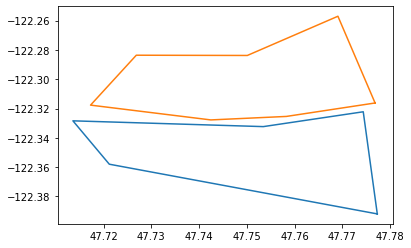

In [15]:
plt.plot(x_c,y_c)
plt.plot(x_c1,y_c1)

In [16]:
north_side = ([47.777104,-122.389053],[47.774561,-122.268551],[47.7330218,-122.2867455],
              [47.680809,-122.24555],[47.651215,-122.27679],
              [47.650981,-122.31833],[47.645201,-122.334468],[47.670876,-122.408617],[47.695826,-122.400731],
              [47.7461816,-122.3773824],[47.777104,-122.389053])

In [17]:
x_North = []
y_North = []
for i in north_side:
    x = i[0]
    y = i[1]
    x_North.append(x)
    y_North.append(y)

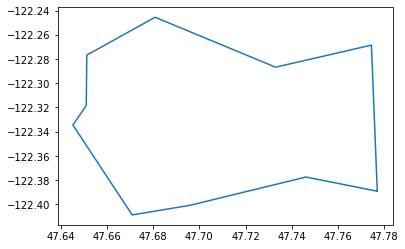

In [18]:
plt.plot(x_North,y_North)

In [19]:
rec19_king_numpy = rec19_king.to_numpy()
rec19_king_numpy

array([[  47.68315345, -122.12748516],
       [  47.67612683, -122.32896604],
       [  47.6471547 , -122.07856593],
       ...,
       [  47.68860174, -122.29886299],
       [  47.70163725, -122.30501955],
       [  47.70195297, -122.32257646]])

In [20]:
rec20_king_numpy = rec20_king.to_numpy()
rec20_king_numpy

array([[  47.6498467 , -122.31965003],
       [  47.62853994, -122.28520156],
       [  47.71140835, -122.35210275],
       ...,
       [  47.60595463, -122.06294036],
       [  47.4596253 , -121.994383  ],
       [  47.66452469, -122.28710133]])

In [21]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

point = Point(0.5, 0.5)
polygon = Polygon([(0, 0), (0, 1), (1, 1), (1, 0)])
print(polygon.contains(point))

True


In [22]:
north_seattle = Polygon(north_side)

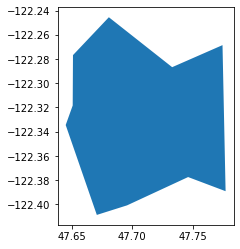

In [23]:
import geopandas as gpd
p = gpd.GeoSeries(north_seattle)
p.plot()
plt.show()

In [24]:
p_in_NorthSeattle_2019 = []
for p in rec19_king_numpy:
    point = Point(p[0],p[1])
    if (north_seattle.contains(point)):
        p_in_NorthSeattle_2019.append(p)

In [25]:
p_in_NorthSeattle_2020 = []
for p in rec20_king_numpy:
    point = Point(p[0],p[1])
    if (north_seattle.contains(point)):
        p_in_NorthSeattle_2020.append(p)

In [26]:
p_in_NorthSeattle_2019  = np.array(p_in_NorthSeattle_2019 )
p_in_NorthSeattle_2020  = np.array(p_in_NorthSeattle_2020 )

In [27]:
df19 = pd.DataFrame(p_in_NorthSeattle_2019 , columns=['Lat','Long'])
df20 = pd.DataFrame(p_in_NorthSeattle_2020 , columns=['Lat','Long'])

In [28]:
df19.count()

Lat     879
Long    879
dtype: int64

In [29]:
df20.count()

Lat     490
Long    490
dtype: int64

In [30]:
coyo19_kmeans5 = KMeans(n_clusters=5)
coyo19_kmeans5.fit(df19)

KMeans(n_clusters=5)

In [31]:
coyo20_kmeans5 = KMeans(n_clusters=5)
coyo20_kmeans5.fit(df20)

KMeans(n_clusters=5)

Text(0.5, 1.0, 'Coyote 2019 Data North Seattle Clusters K = 5')

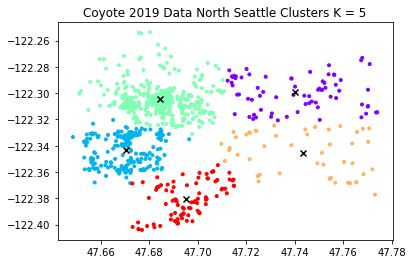

In [32]:
plt.xlim()
plt.scatter(df19.iloc[:,0], df19.iloc[:,1], c=coyo19_kmeans5.labels_, cmap='rainbow',marker='.')
#cluster centroids
plt.scatter(coyo19_kmeans5.cluster_centers_[:,0] ,coyo19_kmeans5.cluster_centers_[:,1], color='black',marker="x")
plt.title("Coyote 2019 Data North Seattle Clusters K = 5")

In [33]:
# The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters

# North seattle clusters silhouette score

In [34]:
#silhouettes_score
silhouette_avg_north19 = silhouette_score(df19,coyo19_kmeans5.labels_)
print("North Seattle cluster avg silhouette_score is: ", silhouette_avg_north19)

North Seattle cluster avg silhouette_score is:  0.5022288553527232


In [35]:
# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(df19, coyo19_kmeans5.labels_)
sample_silhouette_values

array([ 0.34995614,  0.54560045,  0.07450662,  0.50692445,  0.68105234,
        0.69066445,  0.39605739,  0.70463754,  0.7083115 ,  0.49912384,
        0.69240619,  0.6694961 ,  0.62947261,  0.55385674,  0.45072697,
        0.37259165,  0.54068994,  0.61635075,  0.24650424,  0.63573796,
        0.08374923,  0.55048502,  0.56669143,  0.50908323,  0.69665052,
        0.50226622,  0.70635557,  0.68094385,  0.44395519,  0.64415388,
        0.49033273,  0.63498653,  0.35006127,  0.48373469,  0.68116957,
        0.70428377,  0.68298947,  0.45256276,  0.26088707,  0.49551832,
        0.37696191,  0.46821317,  0.51412659,  0.54537195,  0.61264685,
        0.58009164,  0.68064898,  0.49614315,  0.53579697,  0.5588766 ,
        0.68264124,  0.44352855,  0.32234455,  0.5198162 ,  0.56486131,
        0.63459004,  0.60172999,  0.68300909,  0.70609823,  0.33648441,
        0.7042243 ,  0.47250032,  0.62363502,  0.3541409 ,  0.68806381,
        0.70384566,  0.27905902,  0.45491395,  0.33832158,  0.10

Text(0.5, 1.0, 'Coyote 2020 Data North Seattle Clusters K = 5')

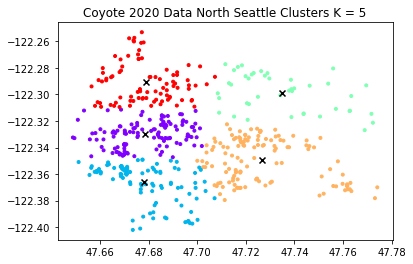

In [36]:
plt.xlim()
plt.scatter(df20.iloc[:,0], df20.iloc[:,1], c=coyo20_kmeans5.labels_, cmap='rainbow',marker='.')
#cluster centroids
plt.scatter(coyo20_kmeans5.cluster_centers_[:,0] ,coyo20_kmeans5.cluster_centers_[:,1], color='black',marker="x")
plt.title("Coyote 2020 Data North Seattle Clusters K = 5")

In [37]:
clusNorth_2019 = df19.copy()
clusNorth_2019 = pd.DataFrame(clusNorth_2019)
clusNorth_2019['labels'] = coyo19_kmeans5.labels_

In [38]:
#clusNorth_2019.to_csv('coyo19KmeansNorthC5_lat_long.csv')

In [39]:
clusNorth_2020 = df20.copy()
clusNorth_2020 = pd.DataFrame(clusNorth_2020)
clusNorth_2020['labels'] = coyo20_kmeans5.labels_

In [40]:
#clusNorth_2020.to_csv('coyo20KmeansNorthC5_lat_long.csv')

## I90 north

In [41]:
I90_north = [(47.770358,-122.261374),(47.773125,-121.892654),(47.5140603,-121.8823472),
             (47.536312,-121.946203),(47.539098,-122.016933),(47.581709,-122.132311),(47.588429,-122.19243),
            (47.618245,-122.241473),(47.770358,-122.261374)]

In [42]:
type(I90_north)

list

In [43]:
polygon_I90North = Polygon(I90_north)

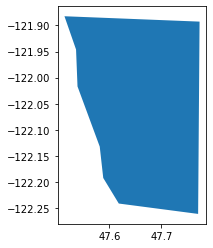

In [44]:
p = gpd.GeoSeries(polygon_I90North)
p.plot()
plt.show()

In [45]:
p_in_I90North_2019 = []
for p in rec19_king_numpy:
    point = Point(p[0],p[1])
    if (polygon_I90North.contains(point)):
        p_in_I90North_2019.append(p)

In [46]:
p_in_I90North_2020 = []
for p in rec20_king_numpy:
    point = Point(p[0],p[1])
    if (polygon_I90North.contains(point)):
        p_in_I90North_2020.append(p)

In [47]:
df19_I90North = pd.DataFrame(np.array(p_in_I90North_2019) , columns=['Lat','Long'])

In [48]:
df20_I90North = pd.DataFrame(np.array(p_in_I90North_2020) , columns=['Lat','Long'])
df20_I90North.count()

Lat     159
Long    159
dtype: int64

In [49]:
df19_I90North.count()

Lat     225
Long    225
dtype: int64

In [50]:
coyo19_kmeansI90North = KMeans(n_clusters=4)
coyo19_kmeansI90North.fit(df19_I90North)

KMeans(n_clusters=4)

In [51]:
coyo20_kmeansI90North = KMeans(n_clusters=4)
coyo20_kmeansI90North.fit(df20_I90North)

KMeans(n_clusters=4)

Text(0.5, 1.0, 'Coyote 2019 Data I90 North Clusters K = 4')

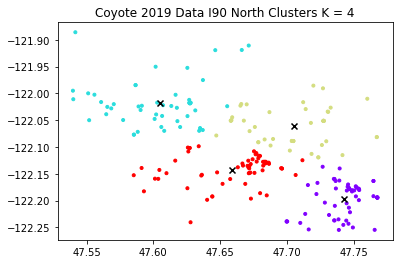

In [52]:
plt.xlim()
plt.scatter(df19_I90North.iloc[:,0], df19_I90North.iloc[:,1], c=coyo19_kmeansI90North.labels_, cmap='rainbow',marker='.')
#cluster centroids
plt.scatter(coyo19_kmeansI90North.cluster_centers_[:,0] ,coyo19_kmeansI90North.cluster_centers_[:,1], color='black',marker="x")
plt.title("Coyote 2019 Data I90 North Clusters K = 4")

# I90 North Clusters silhouette score 

In [53]:
#silhouettes_score
silhouette_avg_I90north19 = silhouette_score(df19_I90North, coyo19_kmeansI90North.labels_)
print("I90 North Seattle cluster avg silhouette_score is: ", silhouette_avg_I90north19)

I90 North Seattle cluster avg silhouette_score is:  0.46826222023665004


Text(0.5, 1.0, 'Coyote 2020 Data I90 North Clusters K = 4')

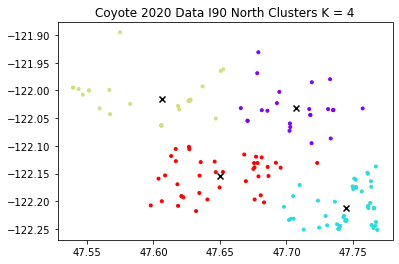

In [54]:
plt.xlim()
plt.scatter(df20_I90North.iloc[:,0], df20_I90North.iloc[:,1], c=coyo20_kmeansI90North.labels_, cmap='rainbow',marker='.')
#cluster centroids
plt.scatter(coyo20_kmeansI90North.cluster_centers_[:,0] ,coyo20_kmeansI90North.cluster_centers_[:,1], color='black',marker="x")
plt.title("Coyote 2020 Data I90 North Clusters K = 4")

In [55]:
clusI90North_2019 = df19_I90North.copy()
clusI90North_2019 = pd.DataFrame(clusI90North_2019)
clusI90North_2019['labels'] = coyo19_kmeansI90North.labels_

In [56]:
#clusI90North_2019.to_csv('coyo19KmeansI90North_lat_long.csv')

In [57]:
clusI90North_2020 = df20_I90North.copy()
clusI90North_2020 = pd.DataFrame(clusI90North_2020)
clusI90North_2020['labels'] = coyo20_kmeansI90North.labels_

In [58]:
clusI90North_2020.to_csv('coyo20KmeansI90North_lat_long.csv')

# I90 South

In [59]:
I90_south = [(47.576632,-122.18962),(47.5682928,-122.1140904),(47.538633,-122.03856),
            (47.502895,-121.884035),(47.390086,-121.954792),(47.290048,-122.088687),
            (47.293774,-122.153229),(47.392408,-122.267215),(47.475785,-122.217428),
            (47.576632,-122.18962)]

In [60]:
polygon_I90South = Polygon(I90_south)

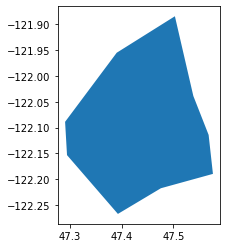

In [61]:
p = gpd.GeoSeries(polygon_I90South)
p.plot()
plt.show()

In [62]:
p_in_I90South_2019 = []
for p in rec19_king_numpy:
    point = Point(p[0],p[1])
    if (polygon_I90South.contains(point)):
        p_in_I90South_2019.append(p)
        
df19_I90South = pd.DataFrame(np.array(p_in_I90South_2019) , columns=['Lat','Long'])

df19_I90South.count()

Lat     112
Long    112
dtype: int64

In [63]:
p_in_I90South_2020 = []
for p in rec20_king_numpy:
    point = Point(p[0],p[1])
    if (polygon_I90South.contains(point)):
        p_in_I90South_2020.append(p)
        
df20_I90South = pd.DataFrame(np.array(p_in_I90South_2020) , columns=['Lat','Long'])

df20_I90South.count() #Did not cluster this one

Lat     60
Long    60
dtype: int64

In [64]:
coyo19_kmeansI90South = KMeans(n_clusters=4)
coyo19_kmeansI90South.fit(df19_I90South)

KMeans(n_clusters=4)

In [65]:
coyo20_kmeansI90South = KMeans(n_clusters=3)
coyo20_kmeansI90South.fit(df20_I90South)

KMeans(n_clusters=3)

Text(0.5, 1.0, 'Coyote 2019 Data I90 South Clusters K = 4')

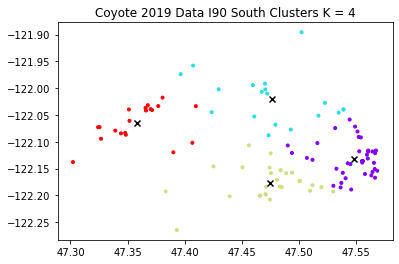

In [66]:
plt.xlim()
plt.scatter(df19_I90South.iloc[:,0], df19_I90South.iloc[:,1], c=coyo19_kmeansI90South.labels_, cmap='rainbow',marker='.')
#cluster centroids
plt.scatter(coyo19_kmeansI90South.cluster_centers_[:,0] ,coyo19_kmeansI90South.cluster_centers_[:,1], color='black',marker="x")
plt.title("Coyote 2019 Data I90 South Clusters K = 4")

# I90 south clusters silhouette score

In [67]:
#silhouettes_score
silhouette_avg_I90south19 = silhouette_score(df19_I90South, coyo19_kmeansI90South.labels_)
print("I90 South Seattle cluster avg silhouette_score is: ", silhouette_avg_I90south19)

I90 South Seattle cluster avg silhouette_score is:  0.4542896362992493


Text(0.5, 1.0, 'Coyote 2020 Data I90 South Clusters K = 3')

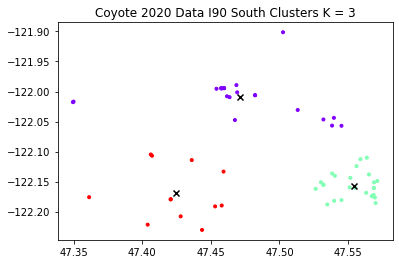

In [68]:
plt.xlim()
plt.scatter(df20_I90South.iloc[:,0], df20_I90South.iloc[:,1], c=coyo20_kmeansI90South.labels_, cmap='rainbow',marker='.')
#cluster centroids
plt.scatter(coyo20_kmeansI90South.cluster_centers_[:,0] ,coyo20_kmeansI90South.cluster_centers_[:,1], color='black',marker="x")
plt.title("Coyote 2020 Data I90 South Clusters K = 3")

In [69]:
clusI90South_2019 = df19_I90South.copy()
clusI90South_2019 = pd.DataFrame(clusI90South_2019)
clusI90South_2019['labels'] = coyo19_kmeansI90South.labels_

In [70]:
clusI90South_2020 = df20_I90South.copy()
#clusI90South_2019 = pd.DataFrame(clusI90South_2019)
clusI90South_2020['labels'] = coyo20_kmeansI90South.labels_

In [71]:
clusI90South_2019.to_csv('coyo19KmeansI90South_lat_long.csv')

In [72]:
clusI90South_2020.to_csv('coyo20KmeansI90South_lat_long.csv')

# Downtown & South Seattle

In [73]:
dt_south_seattle = [(47.66399,-122.424283),(47.634808,-122.274235),(47.57883,-122.285917)
                    ,(47.55775,-122.246096),(47.5283192,-122.2769968),(47.492142,-122.214852),(47.422492,-122.271157)
                    ,(47.354863,-122.2729631),(47.290869,-122.247307),(47.257204,-122.277194),(47.265944,-122.333861),
                   (47.315072,-122.39913),(47.364632,-122.312668),(47.450838,-122.374843),(47.66399,-122.424283)]

In [74]:
polygon_dt_SouthSea = Polygon(dt_south_seattle)

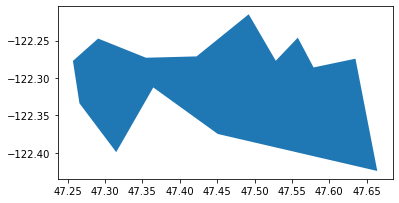

In [75]:
p = gpd.GeoSeries(polygon_dt_SouthSea)
p.plot()
plt.show()

In [76]:
p_in_dt_SouthSea_2019 = []
for p in rec19_king_numpy:
    point = Point(p[0],p[1])
    if (polygon_dt_SouthSea.contains(point)):
        p_in_dt_SouthSea_2019.append(p)
        
df19_dt_SouthSea = pd.DataFrame(np.array(p_in_dt_SouthSea_2019) , columns=['Lat','Long'])

df19_dt_SouthSea.count()

Lat     86
Long    86
dtype: int64

In [77]:
p_in_dt_SouthSea_2020 = []
for p in rec20_king_numpy:
    point = Point(p[0],p[1])
    if (polygon_dt_SouthSea.contains(point)):
        p_in_dt_SouthSea_2020.append(p)
        
df20_dt_SouthSea = pd.DataFrame(np.array(p_in_dt_SouthSea_2020) , columns=['Lat','Long'])

df20_dt_SouthSea.count()

Lat     150
Long    150
dtype: int64

In [78]:
coyo19_kmeansdt_SouthSea = KMeans(n_clusters=4)
coyo19_kmeansdt_SouthSea.fit(df19_dt_SouthSea)

KMeans(n_clusters=4)

In [79]:
coyo20_kmeansdt_SouthSea = KMeans(n_clusters=4)
coyo20_kmeansdt_SouthSea.fit(df20_dt_SouthSea)

KMeans(n_clusters=4)

Text(0.5, 1.0, 'Coyote 2019 Data Downtown & South Seattle Clusters K = 4')

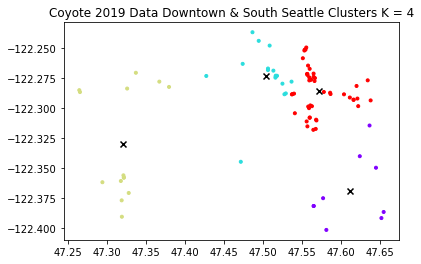

In [80]:
plt.xlim()
plt.scatter(df19_dt_SouthSea.iloc[:,0], df19_dt_SouthSea.iloc[:,1], c=coyo19_kmeansdt_SouthSea.labels_, cmap='rainbow',marker='.')
#cluster centroids
plt.scatter(coyo19_kmeansdt_SouthSea.cluster_centers_[:,0] ,coyo19_kmeansdt_SouthSea.cluster_centers_[:,1], color='black',marker="x")
plt.title("Coyote 2019 Data Downtown & South Seattle Clusters K = 4")

# Downtwon & south clusters silhouette score

In [81]:
#silhouettes_score
silhouette_avg_dt19 = silhouette_score(df19_dt_SouthSea, coyo19_kmeansdt_SouthSea.labels_)
print("Dt & South Seattle cluster avg silhouette_score is: ", silhouette_avg_dt19)

Dt & South Seattle cluster avg silhouette_score is:  0.4505793488652313


Text(0.5, 1.0, 'Coyote 2020 Data Downtown & South Seattle Clusters K = 4')

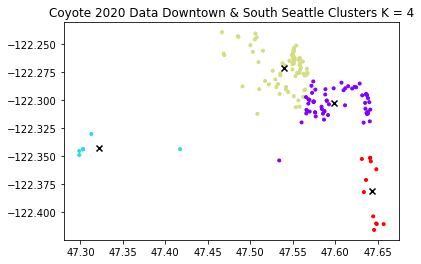

In [82]:
plt.xlim()
plt.scatter(df20_dt_SouthSea.iloc[:,0], df20_dt_SouthSea.iloc[:,1], c=coyo20_kmeansdt_SouthSea.labels_, cmap='rainbow',marker='.')
#cluster centroids
plt.scatter(coyo20_kmeansdt_SouthSea.cluster_centers_[:,0] ,coyo20_kmeansdt_SouthSea.cluster_centers_[:,1], color='black',marker="x")
plt.title("Coyote 2020 Data Downtown & South Seattle Clusters K = 4")

In [83]:
clusDt_SouthSea_2019 = df19_dt_SouthSea.copy()
#clusDt_SouthSea_2019 = pd.DataFrame(clusDt_SouthSea_2019)
clusDt_SouthSea_2019['labels'] = coyo19_kmeansdt_SouthSea.labels_

In [84]:
clusDt_SouthSea_2019.to_csv('coyo19Kmeansdt_SouthSea_lat_long.csv')

In [85]:
clusDt_SouthSea_2020 = df20_dt_SouthSea.copy()
#clusDt_SouthSea_2020 = pd.DataFrame(clusDt_SouthSea_2020)
clusDt_SouthSea_2020['labels'] = coyo20_kmeansdt_SouthSea.labels_

In [86]:
clusDt_SouthSea_2020.to_csv('coyo20Kmeansdt_SouthSea_lat_long.csv')

# Greater North Area

In [87]:
greaterNorth = [(47.777372,-122.394662),(47.772541,-121.88972),(47.513805,-121.880741),(47.538838,-122.026318)
                ,(47.571964,-122.103576),(47.586074,-122.200035),(47.650869,-122.281043),(47.644866,-122.337371)
               ,(47.672178,-122.410155),(47.777372,-122.394662)]

In [88]:
polygon_greaterNorth = Polygon(greaterNorth)

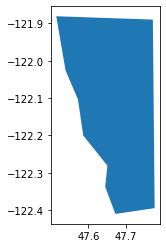

In [89]:
p = gpd.GeoSeries(polygon_greaterNorth)
p.plot()
plt.show()

In [90]:
p_in_greaterNorth_2019 = []
for p in rec19_king_numpy:
    point = Point(p[0],p[1])
    if (polygon_greaterNorth.contains(point)):
        p_in_greaterNorth_2019.append(p)
        
df19_greaterNorth = pd.DataFrame(np.array(p_in_greaterNorth_2019) , columns=['Lat','Long'])

df19_greaterNorth.count()

Lat     1105
Long    1105
dtype: int64

In [91]:
coyo19_kmeans_greaterNorth = KMeans(n_clusters=4)
coyo19_kmeans_greaterNorth.fit(df19_greaterNorth)

KMeans(n_clusters=4)

Text(0.5, 1.0, 'Coyote 2019 Data Greater North Seattle Clusters K = 4')

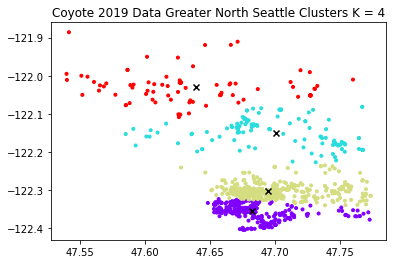

In [92]:
plt.xlim()
plt.scatter(df19_greaterNorth.iloc[:,0], df19_greaterNorth.iloc[:,1], c=coyo19_kmeans_greaterNorth.labels_, cmap='rainbow',marker='.')
#cluster centroids
plt.scatter(coyo19_kmeans_greaterNorth.cluster_centers_[:,0] ,coyo19_kmeans_greaterNorth.cluster_centers_[:,1], color='black',marker="x")
plt.title("Coyote 2019 Data Greater North Seattle Clusters K = 4")

# Greater north clusters silhouette score

In [93]:
#silhouettes_score
silhouette_avg_GreaterNorth19 = silhouette_score(df19_greaterNorth, coyo19_kmeans_greaterNorth.labels_)
print("Greater North Seattle cluster avg silhouette_score is: ", silhouette_avg_GreaterNorth19)

Greater North Seattle cluster avg silhouette_score is:  0.433330786679072


In [94]:
clus_greaterNorth_2019 = df19_greaterNorth.copy()
#clusDt_SouthSea_2019 = pd.DataFrame(clusDt_SouthSea_2019)
clus_greaterNorth_2019['labels'] = coyo19_kmeans_greaterNorth.labels_

In [95]:
clus_greaterNorth_2019.to_csv('coyo19Kmeans_greaterNorthSea_lat_long.csv')

# Greater South

In [96]:
greater_eastSouth = [(47.664609,-122.425591),(47.641016,-122.330857),(47.637749,-122.278586),
                    (47.575772,-122.188764),(47.566449,-122.103713),(47.538528,-122.037022)
                    ,(47.504678,-121.885874),(47.289476,-122.088435),(47.261232,-122.282841)
                    ,(47.313805,-122.402232),(47.444488,-122.372019),(47.664609,-122.425591)]

In [97]:
polygon_greaterEastSouth = Polygon(greater_eastSouth)

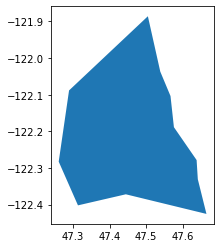

In [98]:
p = gpd.GeoSeries(polygon_greaterEastSouth)
p.plot()
plt.show()

In [99]:
p_in_greaterEastSouth_2019 = []
for p in rec19_king_numpy:
    point = Point(p[0],p[1])
    if (polygon_greaterEastSouth.contains(point)):
        p_in_greaterEastSouth_2019.append(p)
        
df19_greaterEastSouth = pd.DataFrame(np.array(p_in_greaterEastSouth_2019) , columns=['Lat','Long'])

df19_greaterEastSouth.count()

Lat     197
Long    197
dtype: int64

In [100]:
coyo19_kmeans_greaterEastSouth = KMeans(n_clusters=4)
coyo19_kmeans_greaterEastSouth.fit(df19_greaterEastSouth)

KMeans(n_clusters=4)

Text(0.5, 1.0, 'Coyote 2019 Data Greater East South Seattle Clusters K = 4')

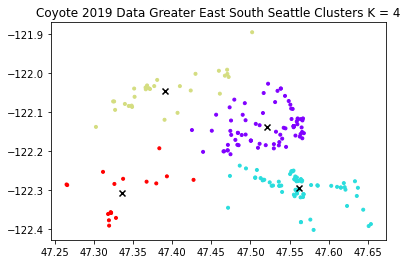

In [101]:
plt.xlim()
plt.scatter(df19_greaterEastSouth.iloc[:,0], df19_greaterEastSouth.iloc[:,1], c=coyo19_kmeans_greaterEastSouth.labels_, cmap='rainbow',marker='.')
#cluster centroids
plt.scatter(coyo19_kmeans_greaterEastSouth.cluster_centers_[:,0] ,coyo19_kmeans_greaterEastSouth.cluster_centers_[:,1], color='black',marker="x")
plt.title("Coyote 2019 Data Greater East South Seattle Clusters K = 4")

# Greater south clusters silhouette score

In [102]:
#silhouettes_score
silhouette_avg_GreaterSouth19 = silhouette_score(df19_greaterEastSouth, coyo19_kmeans_greaterEastSouth.labels_)
print("Greater South Seattle cluster avg silhouette_score is: ", silhouette_avg_GreaterSouth19)

Greater South Seattle cluster avg silhouette_score is:  0.5480444877369532


In [103]:
clus_greaterEastSouth_2019 = df19_greaterEastSouth.copy()
clus_greaterEastSouth_2019['labels'] = coyo19_kmeans_greaterEastSouth.labels_

In [104]:
clus_greaterEastSouth_2019.to_csv('coyo19Kmeans_greaterEastSouthSea_lat_long.csv')

# Greater East

In [105]:
greater_east = [(47.770562,-122.261126),(47.773331,-121.89317),(47.514845,-121.882055)
               ,(47.346463,-122.001702),(47.29398,-122.125899),(47.391572,-122.267348)
               ,(47.479993,-122.210314),(47.57591,-122.189715),(47.618971,-122.241299)
               ,(47.770562,-122.261126)]

In [106]:
polygon_greaterEast = Polygon(greater_east)

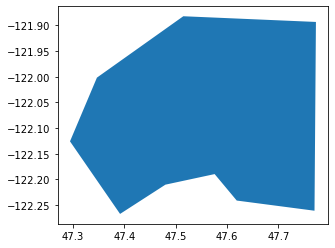

In [107]:
p = gpd.GeoSeries(polygon_greaterEast)
p.plot()
plt.show()

In [108]:
p_in_greaterEast_2019 = []
for p in rec19_king_numpy:
    point = Point(p[0],p[1])
    if (polygon_greaterEast.contains(point)):
        p_in_greaterEast_2019.append(p)
        
df19_greaterEast = pd.DataFrame(np.array(p_in_greaterEast_2019) , columns=['Lat','Long'])

df19_greaterEast.count()

Lat     335
Long    335
dtype: int64

In [109]:
coyo19_kmeans_greaterEast = KMeans(n_clusters=7)
coyo19_kmeans_greaterEast.fit(df19_greaterEast)

KMeans(n_clusters=7)

Text(0.5, 1.0, 'Coyote 2019 Data Greater East Seattle Clusters K = 7')

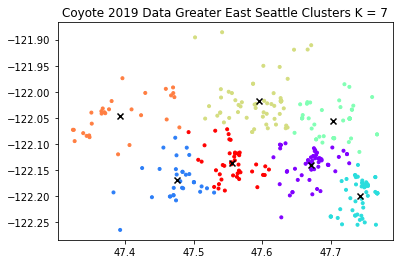

In [110]:
plt.xlim()
plt.scatter(df19_greaterEast.iloc[:,0], df19_greaterEast.iloc[:,1], c=coyo19_kmeans_greaterEast.labels_, cmap='rainbow',marker='.')
#cluster centroids
plt.scatter(coyo19_kmeans_greaterEast.cluster_centers_[:,0] ,coyo19_kmeans_greaterEast.cluster_centers_[:,1], color='black',marker="x")
plt.title("Coyote 2019 Data Greater East Seattle Clusters K = 7")

# Greater East clusters silhouette score

In [111]:
#silhouettes_score
silhouette_avg_GreaterEast19 = silhouette_score(df19_greaterEast, coyo19_kmeans_greaterEast.labels_)
print("Greater East Seattle cluster avg silhouette_score is: ", silhouette_avg_GreaterEast19)

Greater East Seattle cluster avg silhouette_score is:  0.435945810283848


In [112]:
clus_greaterEast_2019 = df19_greaterEast.copy()
clus_greaterEast_2019['labels'] = coyo19_kmeans_greaterEast.labels_

In [113]:
clus_greaterEast_2019.to_csv('coyo19Kmeans_greaterEastSea_lat_long.csv')

# Greater West

In [114]:
greater_west = [(47.777472,-122.394388),(47.773291,-122.270148),(47.711415,-122.281049),
               (47.679093,-122.251523),(47.579081,-122.287169),(47.557828,-122.246743)
               ,(47.526758,-122.277642),(47.49199,-122.215828),(47.421875,-122.272144)
               ,(47.353515,-122.272809),(47.289761,-122.247392),(47.257172,-122.275544)
               ,(47.288795,-122.365513),(47.314376,-122.401898),(47.363311,-122.313343)
               ,(47.582352,-122.40741),(47.777472,-122.394388)]

In [115]:
polygon_greaterWest = Polygon(greater_west)

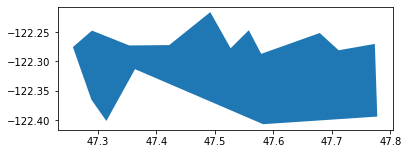

In [116]:
p = gpd.GeoSeries(polygon_greaterWest)
p.plot()
plt.show()

In [117]:
p_in_greaterWest_2019 = []
for p in rec19_king_numpy:
    point = Point(p[0],p[1])
    if (polygon_greaterWest.contains(point)):
        p_in_greaterWest_2019.append(p)
        
df19_greaterWest = pd.DataFrame(np.array(p_in_greaterWest_2019) , columns=['Lat','Long'])

df19_greaterWest.count()

Lat     958
Long    958
dtype: int64

In [118]:
coyo19_kmeans_greaterWest = KMeans(n_clusters=8)
coyo19_kmeans_greaterWest.fit(df19_greaterWest)

KMeans()

Text(0.5, 1.0, 'Coyote 2019 Data Greater West Seattle Clusters K = 8')

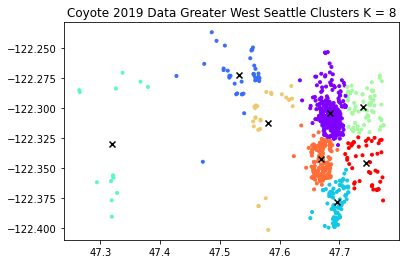

In [119]:
plt.xlim()
plt.scatter(df19_greaterWest.iloc[:,0], df19_greaterWest.iloc[:,1], c=coyo19_kmeans_greaterWest.labels_, cmap='rainbow',marker='.')
#cluster centroids
plt.scatter(coyo19_kmeans_greaterWest.cluster_centers_[:,0] ,coyo19_kmeans_greaterWest.cluster_centers_[:,1], color='black',marker="x")
plt.title("Coyote 2019 Data Greater West Seattle Clusters K = 8")

## Greater west clusters silhouette score

In [120]:
#silhouettes_score
silhouette_avg_GreaterWest19 = silhouette_score(df19_greaterWest, coyo19_kmeans_greaterWest.labels_)
print("Greater West Seattle cluster avg silhouette_score is: ", silhouette_avg_GreaterWest19)

Greater West Seattle cluster avg silhouette_score is:  0.4891122206029521


In [121]:
clus_greaterWest_2019 = df19_greaterWest.copy()
clus_greaterWest_2019['labels'] = coyo19_kmeans_greaterWest.labels_

In [122]:
clus_greaterWest_2019.to_csv('coyo19Kmeans_greaterWestSea_lat_long.csv')

# I5West

In [123]:
I5_west = [(47.776607,-122.393131),(47.776838,-122.32099),(47.749973,-122.332842),(47.731409,-122.323379)
          ,(47.691188,-122.331946),(47.684153,-122.324221),(47.675384,-122.320976),(47.63457,-122.324409)
          ,(47.60356,-122.334709),(47.573473,-122.32134),(47.553405,-122.323722),(47.540094,-122.303278)
          ,(47.488776,-122.270121),(47.432669,-122.273797),(47.408736,-122.306562),(47.354352,-122.298988)
          ,(47.268911,-122.320315),(47.319426,-122.412347),(47.348054,-122.319958),(47.578068,-122.410378)
          ,(47.606807,-122.342314),(47.661609,-122.432543),(47.717753,-122.37894),(47.776607,-122.393131)]

In [124]:
polygon_I5West = Polygon(I5_west)

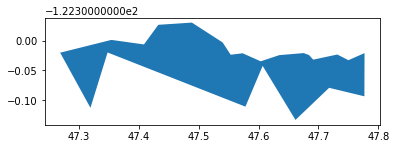

In [125]:
p = gpd.GeoSeries(polygon_I5West)
p.plot()
plt.show()

In [126]:
p_in_I5West_2019 = []
for p in rec19_king_numpy:
    point = Point(p[0],p[1])
    if (polygon_I5West.contains(point)):
        p_in_I5West_2019.append(p)
        
df19_I5West = pd.DataFrame(np.array(p_in_I5West_2019) , columns=['Lat','Long'])

df19_I5West.count()

Lat     381
Long    381
dtype: int64

In [127]:
coyo19_kmeans_I5West = KMeans(n_clusters=5)
coyo19_kmeans_I5West.fit(df19_I5West)

KMeans(n_clusters=5)

Text(0.5, 1.0, 'Coyote 2019 Data I5 West Clusters K = 6')

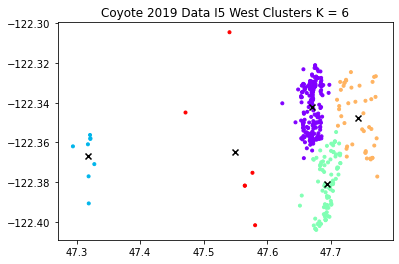

In [128]:
plt.xlim()
plt.scatter(df19_I5West.iloc[:,0], df19_I5West.iloc[:,1], c=coyo19_kmeans_I5West.labels_, cmap='rainbow',marker='.')
#cluster centroids
plt.scatter(coyo19_kmeans_I5West.cluster_centers_[:,0] ,coyo19_kmeans_I5West.cluster_centers_[:,1], color='black',marker="x")
plt.title("Coyote 2019 Data I5 West Clusters K = 6")

In [129]:
clus_I5West_2019 = df19_I5West.copy()
clus_I5West_2019['labels'] = coyo19_kmeans_I5West.labels_

In [130]:
clus_I5West_2019.to_csv('coyo19Kmeans_I5West_lat_long.csv')

## I5 West Cluster Silhouette scores

In [131]:
#silhouettes_score
silhouette_avg_I5West19 = silhouette_score(df19_I5West, coyo19_kmeans_I5West.labels_)
print("I5 West cluster avg silhouette_score is: ", silhouette_avg_I5West19)

I5 West cluster avg silhouette_score is:  0.5563895571456514


# I5 East

In [132]:
I5_east = [(47.776654,-122.316886),(47.769732,-121.973306),(47.662559,-121.902667)
          ,(47.483921,-121.877519),(47.263509,-122.07399),(47.252819,-122.291528)
          ,(47.273264,-122.308008),(47.471857,-122.264697),(47.511816,-122.273666)
          ,(47.525278,-122.290811),(47.556494,-122.315509),(47.567035,-122.320444)
          ,(47.683682,-122.319333),(47.686138,-122.324611),(47.696827,-122.328602)
          ,(47.734651,-122.321693),(47.743973,-122.328581),(47.755256,-122.328581),(47.776654,-122.316886)]

In [133]:
polygon_I5East = Polygon(I5_east)

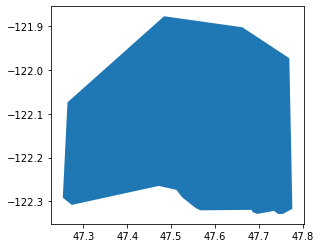

In [134]:
p = gpd.GeoSeries(polygon_I5East)
p.plot()
plt.show()

In [135]:
p_in_I5East_2019 = []
for p in rec19_king_numpy:
    point = Point(p[0],p[1])
    if (polygon_I5East.contains(point)):
        p_in_I5East_2019.append(p)
        
df19_I5East = pd.DataFrame(np.array(p_in_I5East_2019) , columns=['Lat','Long'])

df19_I5East.count()

Lat     925
Long    925
dtype: int64

In [136]:
coyo19_kmeans_I5East = KMeans(n_clusters=11)
coyo19_kmeans_I5East.fit(df19_I5East)

KMeans(n_clusters=11)

Text(0.5, 1.0, 'Coyote 2019 Data I5 East Clusters K = 11')

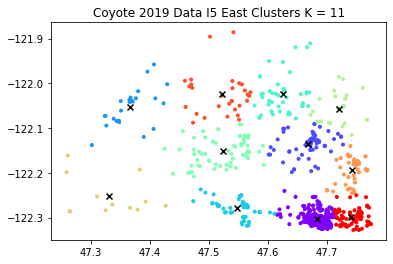

In [137]:
plt.xlim()
plt.scatter(df19_I5East.iloc[:,0], df19_I5East.iloc[:,1], c=coyo19_kmeans_I5East.labels_, cmap='rainbow',marker='.')
#cluster centroids
plt.scatter(coyo19_kmeans_I5East.cluster_centers_[:,0] ,coyo19_kmeans_I5East.cluster_centers_[:,1], color='black',marker="x")
plt.title("Coyote 2019 Data I5 East Clusters K = 11")

In [138]:
clus_I5East_2019 = df19_I5East.copy()
clus_I5East_2019['labels'] = coyo19_kmeans_I5East.labels_
clus_I5East_2019.to_csv('coyo19Kmeans_I5East_lat_long.csv')

## I5 East Clusters Silhouette score

In [139]:
#silhouettes_score
silhouette_avg_I5East19 = silhouette_score(df19_I5East, coyo19_kmeans_I5East.labels_)
print("I5 East cluster avg silhouette_score is: ", silhouette_avg_I5East19)

I5 East cluster avg silhouette_score is:  0.5548310483181367


# North Seattle I5West

In [140]:
north_I5West = [(47.777582,-122.393571),(47.777063,-122.31907),(47.75349,-122.33195)
               ,(47.743568,-122.330726),(47.731228,-122.324207),(47.696001,-122.331076)
               ,(47.68359,-122.32384),(47.675427,-122.321018),(47.653452,-122.323363)
               ,(47.645024,-122.334349),(47.668713,-122.406661),(47.695749,-122.403716)
               ,(47.722332,-122.374118),(47.777582,-122.393571)]

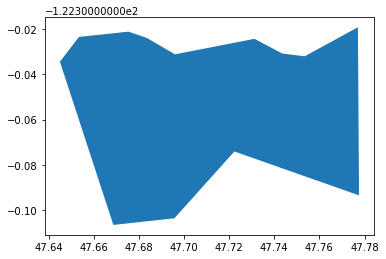

In [141]:
polygon_NorthI5West = Polygon(north_I5West)
p = gpd.GeoSeries(polygon_NorthI5West)
p.plot()
plt.show()

In [142]:
p_in_NorthI5West_2019 = []
for p in rec19_king_numpy:
    point = Point(p[0],p[1])
    if (polygon_NorthI5West.contains(point)):
        p_in_NorthI5West_2019.append(p)
        
df19_NorthI5West = pd.DataFrame(np.array(p_in_NorthI5West_2019) , columns=['Lat','Long'])

df19_NorthI5West.count()

Lat     363
Long    363
dtype: int64

In [143]:
coyo19_kmeans_NorthI5West = KMeans(n_clusters=3)
coyo19_kmeans_NorthI5West.fit(df19_NorthI5West)

KMeans(n_clusters=3)

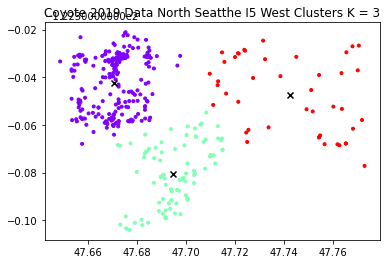

In [144]:
plt.xlim()
plt.scatter(df19_NorthI5West.iloc[:,0], df19_NorthI5West.iloc[:,1], c=coyo19_kmeans_NorthI5West.labels_, cmap='rainbow',marker='.')
#cluster centroids
plt.scatter(coyo19_kmeans_NorthI5West.cluster_centers_[:,0] ,coyo19_kmeans_NorthI5West.cluster_centers_[:,1], color='black',marker="x")
plt.title("Coyote 2019 Data North Seatthe I5 West Clusters K = 3")
plt.show()

In [145]:
clus_NorthI5West_2019 = df19_NorthI5West.copy()
clus_NorthI5West_2019['labels'] = coyo19_kmeans_NorthI5West.labels_
clus_NorthI5West_2019.to_csv('coyo19Kmeans_NorthI5West_lat_long.csv')

## North Seattle I5 West Silhouette score

In [146]:
#silhouettes_score
silhouette_avg_NorthI5West19 = silhouette_score(df19_NorthI5West, coyo19_kmeans_NorthI5West.labels_)
print("North Seattle I5 West cluster avg silhouette_score is: ", silhouette_avg_NorthI5West19)

North Seattle I5 West cluster avg silhouette_score is:  0.5561250475149052


# North Seattle I5 East

In [147]:
north_I5East = [(47.776966,-122.316826),(47.77538,-122.267817),(47.753716,-122.274812)
               ,(47.734184,-122.289579),(47.680384,-122.248595),(47.646914,-122.277606)
               ,(47.654357,-122.321337),(47.680037,-122.320769),(47.682739,-122.320448)
               ,(47.685447,-122.323816),(47.695406,-122.328655),(47.739373,-122.321528)
               ,(47.743557,-122.328866),(47.756354,-122.328308),(47.776966,-122.316826)]

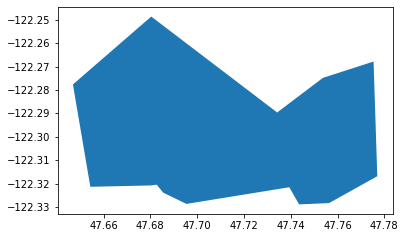

In [148]:
polygon_NorthI5East = Polygon(north_I5East)
p = gpd.GeoSeries(polygon_NorthI5East)
p.plot()
plt.show()

In [149]:
p_in_NorthI5East_2019 = []
for p in rec19_king_numpy:
    point = Point(p[0],p[1])
    if (polygon_NorthI5East.contains(point)):
        p_in_NorthI5East_2019.append(p)
        
df19_NorthI5East = pd.DataFrame(np.array(p_in_NorthI5East_2019) , columns=['Lat','Long'])

df19_NorthI5East.count()

Lat     516
Long    516
dtype: int64

In [150]:
coyo19_kmeans_NorthI5East = KMeans(n_clusters=2)
coyo19_kmeans_NorthI5East.fit(df19_NorthI5East)

KMeans(n_clusters=2)

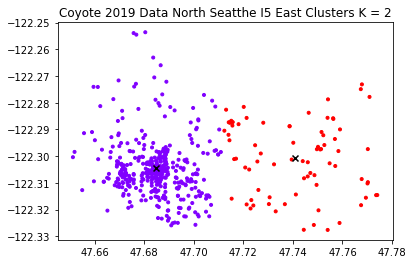

In [151]:
plt.xlim()
plt.scatter(df19_NorthI5East.iloc[:,0], df19_NorthI5East.iloc[:,1], c=coyo19_kmeans_NorthI5East.labels_, cmap='rainbow',marker='.')
#cluster centroids
plt.scatter(coyo19_kmeans_NorthI5East.cluster_centers_[:,0] ,coyo19_kmeans_NorthI5East.cluster_centers_[:,1], color='black',marker="x")
plt.title("Coyote 2019 Data North Seatthe I5 East Clusters K = 2")
plt.show()

In [152]:
clus_NorthI5East_2019 = df19_NorthI5East.copy()
clus_NorthI5East_2019['labels'] = coyo19_kmeans_NorthI5East.labels_
clus_NorthI5East_2019.to_csv('coyo19Kmeans_NorthI5East_lat_long.csv')

## North Seattle I5 East silhouette score

In [153]:
#silhouettes_score
silhouette_avg_NorthI5East19 = silhouette_score(df19_NorthI5East, coyo19_kmeans_NorthI5East.labels_)
print("North Seattle I5 East cluster avg silhouette_score is: ", silhouette_avg_NorthI5East19)

North Seattle I5 East cluster avg silhouette_score is:  0.6481747275040154


## Compare with North Seattle without being divided by I5

In [154]:
print("North Seattle cluster avg silhouette_score is: ", silhouette_avg_north19)
print("North Seattle I5 West cluster avg silhouette_score is: ", silhouette_avg_NorthI5West19)
print("North Seattle I5 East cluster avg silhouette_score is: ", silhouette_avg_NorthI5East19)

North Seattle cluster avg silhouette_score is:  0.5022288553527232
North Seattle I5 West cluster avg silhouette_score is:  0.5561250475149052
North Seattle I5 East cluster avg silhouette_score is:  0.6481747275040154


# Kmeans Silhouette scores of all subregions

In [155]:
print("Kmeans clustering silhouette score evaluations")
print("\n")
print("North Seattle cluster avg silhouette_score is: ", silhouette_avg_north19)
print('-----------------------------------------------------------------------------------')
print("I90 North Seattle cluster avg silhouette_score is: ", silhouette_avg_I90north19)
print('-----------------------------------------------------------------------------------')
print("I90 South Seattle cluster avg silhouette_score is: ", silhouette_avg_I90south19)
print('-----------------------------------------------------------------------------------')
print("Dt & South Seattle cluster avg silhouette_score is: ", silhouette_avg_dt19)
print('-----------------------------------------------------------------------------------')
print("Greater North Seattle cluster avg silhouette_score is: ", silhouette_avg_GreaterNorth19)
print('-----------------------------------------------------------------------------------')
print("Greater South Seattle cluster avg silhouette_score is: ", silhouette_avg_GreaterSouth19)
print('-----------------------------------------------------------------------------------')
print("Greater East Seattle cluster avg silhouette_score is: ", silhouette_avg_GreaterEast19)
print('-----------------------------------------------------------------------------------')
print("Greater West Seattle cluster avg silhouette_score is: ", silhouette_avg_GreaterWest19)

Kmeans clustering silhouette score evaluations


North Seattle cluster avg silhouette_score is:  0.5022288553527232
-----------------------------------------------------------------------------------
I90 North Seattle cluster avg silhouette_score is:  0.46826222023665004
-----------------------------------------------------------------------------------
I90 South Seattle cluster avg silhouette_score is:  0.4542896362992493
-----------------------------------------------------------------------------------
Dt & South Seattle cluster avg silhouette_score is:  0.4505793488652313
-----------------------------------------------------------------------------------
Greater North Seattle cluster avg silhouette_score is:  0.433330786679072
-----------------------------------------------------------------------------------
Greater South Seattle cluster avg silhouette_score is:  0.5480444877369532
-----------------------------------------------------------------------------------
Greater East Sea

# I90 Northwest

In [156]:
I90NW = [(47.769072,-122.259744),(47.769444,-122.191219),(47.759983,-122.187785),
         (47.728554,-122.195599),(47.71055,-122.185608),(47.610465,-122.192699),
         (47.600743,-122.184459),(47.586966,-122.181541),(47.588008,-122.191326),
         (47.617871,-122.241966),(47.769025,-122.260156)]

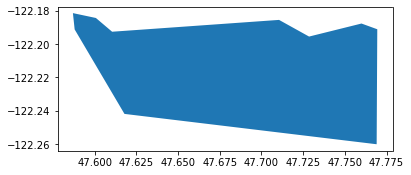

In [157]:
polygon_I90NW = Polygon(I90NW)
p = gpd.GeoSeries(polygon_I90NW)
p.plot()
plt.show()

In [158]:
p_in_I90NW_2019 = []
for p in rec19_king_numpy:
    point = Point(p[0],p[1])
    if (polygon_I90NW.contains(point)):
        p_in_I90NW_2019.append(p)
        
df19_I90NW = pd.DataFrame(np.array(p_in_I90NW_2019) , columns=['Lat','Long'])
df19_I90NW.count()

Lat     35
Long    35
dtype: int64

In [159]:
coyo19_kmeans_I90NW = KMeans(n_clusters=2)
coyo19_kmeans_I90NW.fit(df19_I90NW)

KMeans(n_clusters=2)

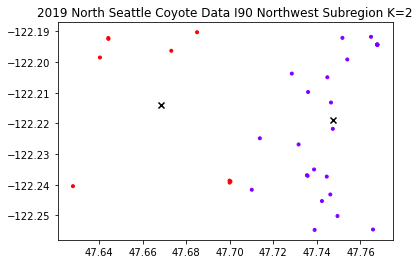

In [160]:
plt.xlim()
plt.scatter(df19_I90NW.iloc[:,0], df19_I90NW.iloc[:,1], c=coyo19_kmeans_I90NW.labels_, cmap='rainbow',marker='.')
#cluster centroids
plt.scatter(coyo19_kmeans_I90NW.cluster_centers_[:,0] ,coyo19_kmeans_I90NW.cluster_centers_[:,1], color='black',marker="x")
plt.title("2019 North Seattle Coyote Data I90 Northwest Subregion K=2")
plt.show()

In [161]:
clus_I90NW_2019 = df19_I90NW.copy()
clus_I90NW_2019['labels'] = coyo19_kmeans_I90NW.labels_
clus_I90NW_2019.to_csv('coyo19Kmeans_I90NW_lat_long.csv')

# I90 Northwest Silhouette Score

In [162]:
#silhouettes_score
silhouette_avg_I90NW = silhouette_score(df19_I90NW, coyo19_kmeans_I90NW.labels_)
print("North Seattle I90 Northwest cluster avg silhouette_score is: ", silhouette_avg_I90NW)

North Seattle I90 Northwest cluster avg silhouette_score is:  0.5288386755411302


# I90 Northeast

In [163]:
I90NE = [(47.769536,-122.188188),(47.772801,-121.892734),(47.513179,-121.883059),
         (47.536486,-121.946196),(47.539219,-122.017866),(47.581722,-122.13229),
         (47.587446,-122.17684),(47.605157,-122.179071),(47.610365,-122.185766),
         (47.708628,-122.176988),(47.728038,-122.185287),(47.761184,-122.180994)]

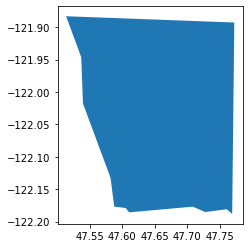

In [164]:
polygon_I90NE = Polygon(I90NE)
p = gpd.GeoSeries(polygon_I90NE)
p.plot()
plt.show()

In [165]:
p_in_I90NE_2019 = []
for p in rec19_king_numpy:
    point = Point(p[0],p[1])
    if (polygon_I90NE.contains(point)):
        p_in_I90NE_2019.append(p)
        
df19_I90NE = pd.DataFrame(np.array(p_in_I90NE_2019) , columns=['Lat','Long'])
df19_I90NE.count()

Lat     185
Long    185
dtype: int64

In [166]:
coyo19_kmeans_I90NE = KMeans(n_clusters=2)
coyo19_kmeans_I90NE.fit(df19_I90NE)

KMeans(n_clusters=2)

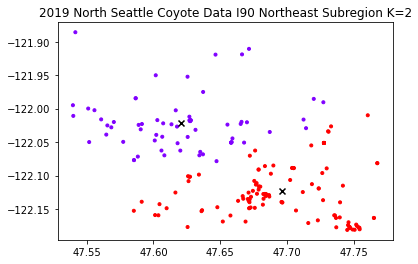

In [167]:
plt.xlim()
plt.scatter(df19_I90NE.iloc[:,0], df19_I90NE.iloc[:,1], c=coyo19_kmeans_I90NE.labels_, cmap='rainbow',marker='.')
#cluster centroids
plt.scatter(coyo19_kmeans_I90NE.cluster_centers_[:,0] ,coyo19_kmeans_I90NE.cluster_centers_[:,1], color='black',marker="x")
plt.title("2019 North Seattle Coyote Data I90 Northeast Subregion K=2")
plt.show()

In [168]:
clus_I90NE_2019 = df19_I90NE.copy()
clus_I90NE_2019['labels'] = coyo19_kmeans_I90NE.labels_
clus_I90NE_2019.to_csv('coyo19Kmeans_I90NE_lat_long.csv')

# I90 Northeast Silhouette Score

In [169]:
#silhouettes_score
silhouette_avg_I90NE = silhouette_score(df19_I90NE, coyo19_kmeans_I90NE.labels_)
print("North Seattle I90 Northeast cluster avg silhouette_score is: ", silhouette_avg_I90NE)

North Seattle I90 Northeast cluster avg silhouette_score is:  0.46640053281293276


# I5 Southwest

In [170]:
I5SW = [(47.662994,-122.422896),(47.64459,-122.326657),(47.608262,-122.333524),
        (47.597151,-122.322537),(47.554766,-122.323224),(47.489985,-122.268842),
        (47.479081,-122.275709),(47.457729,-122.266096),(47.434256,-122.273052),
        (47.418461,-122.293994),(47.384207,-122.292761),(47.354677,-122.299284),
        (47.34421,-122.29482),(47.283224,-122.310753),(47.265987,-122.333756),
        (47.315821,-122.402421),(47.365074,-122.312615),(47.451926,-122.376551)]

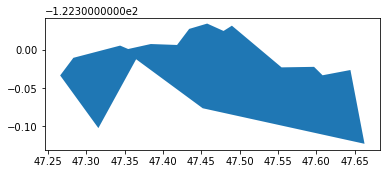

In [171]:
polygon_I5SW = Polygon(I5SW)
p = gpd.GeoSeries(polygon_I5SW)
p.plot()
plt.show()

In [172]:
p_in_I5SW_2019 = []
for p in rec19_king_numpy:
    point = Point(p[0],p[1])
    if (polygon_I5SW.contains(point)):
        p_in_I5SW_2019.append(p)
        
df19_I5SW = pd.DataFrame(np.array(p_in_I5SW_2019) , columns=['Lat','Long'])
df19_I5SW.count()

Lat     17
Long    17
dtype: int64

In [173]:
coyo19_kmeans_I5SW = KMeans(n_clusters=2)
coyo19_kmeans_I5SW.fit(df19_I5SW)

KMeans(n_clusters=2)

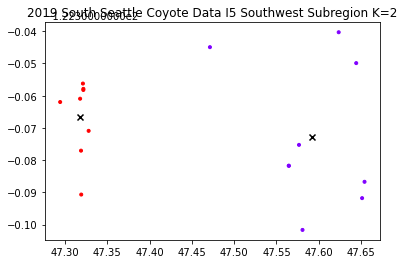

In [174]:
plt.xlim()
plt.scatter(df19_I5SW.iloc[:,0], df19_I5SW.iloc[:,1], c=coyo19_kmeans_I5SW.labels_, cmap='rainbow',marker='.')
#cluster centroids
plt.scatter(coyo19_kmeans_I5SW.cluster_centers_[:,0] ,coyo19_kmeans_I5SW.cluster_centers_[:,1], color='black',marker="x")
plt.title("2019 South Seattle Coyote Data I5 Southwest Subregion K=2")
plt.show()

In [175]:
clus_I5SW_2019 = df19_I5SW.copy()
clus_I5SW_2019['labels'] = coyo19_kmeans_I5SW.labels_
clus_I5SW_2019.to_csv('coyo19Kmeans_I5SW_lat_long.csv')

# I5 Southwest Silhouette Score

In [176]:
#silhouettes_score
silhouette_avg_I5SW = silhouette_score(df19_I5SW, coyo19_kmeans_I5SW.labels_)
print("South Seattle I90 Southwest cluster avg silhouette_score is: ", silhouette_avg_I5SW)

South Seattle I90 Southwest cluster avg silhouette_score is:  0.8048156623473427


# I 90 South North Region

In [177]:
South_I90 = [(47.577466,-122.171425),(47.56658,-122.175545),(47.55546,-122.183098),(47.545727,-122.18),(47.533675,-122.191681),
                  (47.522316,-122.191681),(47.501446,-122.189621),(47.4884455,-122.186188),(47.47755,-122.190308),(47.46643,-122.205757),
                 (47.455734,-122.21281),(47.443197,-122.213654),(47.433211,-122.216057),(47.399758,-122.216057),(47.387905,-122.228073),
                 (47.376281,-122.235627),(47.364888,-122.24009),(47.351166,-122.24112),(47.331392,-122.241806),(47.331624,-122.243866),
                 (47.320221,-122.243866),(47.312773,-122.22773),(47.307186,-122.210907),(47.306022,-122.194771),(47.310445,-122.177605),
                 (47.323014,-122.169709),(47.335347,-122.157349),(47.346049,-122.149453),(47.338609,-122.136063),(47.369771,-122.118554),
                 (47.382558,-122.082161),(47.394878,-122.052636),(47.405567,-122.0039246),(47.416952,-122.029976),(47.422759,-122.01281),
                 (47.433908,-121.997784),(47.447608,-121.965088),(47.460608,-121.965088),(47.471981,-121.944832),(47.478479,-121.927666),
                 (47.481959,-121.90947),(47.487527,-121.89402),(47.498894,-121.889557),(47.520229,-121.938652),(47.529503,-121.955475),
                 (47.531821,-121.971611),(47.532284,-122.00457),(47.530198,-122.02288),(47.530894,-122.038216),(47.542109,-122.051606),
                 (47.561252,-122.100357),(47.572603,-122.11718),(47.58094,-122.154946)]

x = []
for p in South_I90:
    temp = p[1]
    temp = temp-0.003 # Moving points over just a bit 
    t = (p[0],temp)
    x.append(t)

South_I90 = x

I90_South_South = [] #Create array of I90 South points below WA-169

for p in South_I90:
    if(p[0] > 47.4): #Latitude value of 47.4 used as it is the lowest point of WA-169 (the separator)
        South_I90.remove(p)
        I90_South_South.append(p)

I90_South_North = South_I90 #Contains points above WA-169


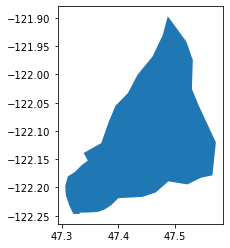

In [178]:
polygon_I90_South_North = Polygon(I90_South_North)
p = gpd.GeoSeries(polygon_I90_South_North)
p.plot()
plt.show()

In [179]:
p_in_I90_South_North_2019 = []

for p in rec19_king_numpy:
    point= Point(p[0],p[1])
    if(polygon_I90_South_North.contains(point)):
        p_in_I90_South_North_2019.append(p)

In [180]:
df19_I90_South_North = pd.DataFrame(np.array(p_in_I90_South_North_2019),columns = ['Lat','Long'])
df19_I90_South_North.count()

Lat     83
Long    83
dtype: int64

In [181]:
coyo19_kmeans_I90SN = KMeans(n_clusters=2)
coyo19_kmeans_I90SN.fit(df19_I90_South_North)

KMeans(n_clusters=2)

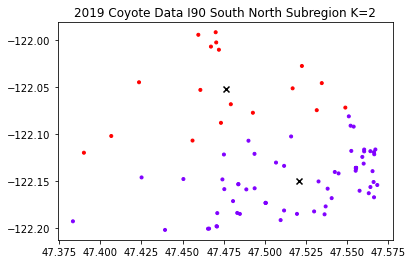

In [182]:
plt.xlim()
plt.scatter(df19_I90_South_North.iloc[:,0], df19_I90_South_North.iloc[:,1], c=coyo19_kmeans_I90SN.labels_, cmap='rainbow',marker='.')
#cluster centroids
plt.scatter(coyo19_kmeans_I90SN.cluster_centers_[:,0] ,coyo19_kmeans_I90SN.cluster_centers_[:,1], color='black',marker="x")
plt.title("2019 Coyote Data I90 South North Subregion K=2")
plt.show()

In [183]:
clus_I90SN_2019 = df19_I90_South_North.copy()
clus_I90SN_2019['labels'] = coyo19_kmeans_I90SN.labels_
clus_I90SN_2019.to_csv('coyo19Kmeans_I90SN_lat_long.csv')

In [184]:
silhouette_avg_I90SN = silhouette_score(df19_I90_South_North, coyo19_kmeans_I90SN.labels_)
print("I90 South North Region cluster avg silhouette_score is: ", silhouette_avg_I90SN)

I90 South North Region cluster avg silhouette_score is:  0.46108674151148504


# I90 South South Region

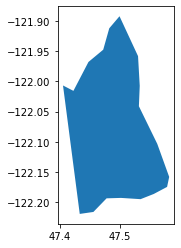

In [185]:
polygon_I90_South_South = Polygon(I90_South_South)
p = gpd.GeoSeries(polygon_I90_South_South)
p.plot()
plt.show()

In [186]:
p_in_I90_South_South_2019 = []

for p in rec19_king_numpy:
    point= Point(p[0],p[1])
    if(polygon_I90_South_South.contains(point)):
        p_in_I90_South_South_2019.append(p)

In [187]:
df19_I90_South_South = pd.DataFrame(np.array(p_in_I90_South_South_2019),columns = ['Lat','Long'])
df19_I90_South_South.count()

Lat     79
Long    79
dtype: int64

In [188]:
coyo19_kmeans_I90SS = KMeans(n_clusters=2)
coyo19_kmeans_I90SS.fit(df19_I90_South_South)

KMeans(n_clusters=2)

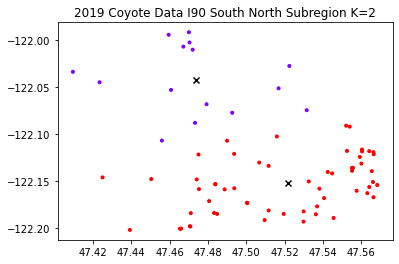

In [189]:
plt.xlim()
plt.scatter(df19_I90_South_South.iloc[:,0], df19_I90_South_South.iloc[:,1], c=coyo19_kmeans_I90SS.labels_, cmap='rainbow',marker='.')
#cluster centroids
plt.scatter(coyo19_kmeans_I90SS.cluster_centers_[:,0] ,coyo19_kmeans_I90SS.cluster_centers_[:,1], color='black',marker="x")
plt.title("2019 Coyote Data I90 South North Subregion K=2")
plt.show()

In [190]:
clus_I90SS_2019 = df19_I90_South_South.copy()
clus_I90SS_2019['labels'] = coyo19_kmeans_I90SS.labels_
clus_I90SS_2019.to_csv('coyo19Kmeans_I90SS_lat_long.csv')

In [191]:
silhouette_avg_I90SS = silhouette_score(df19_I90_South_South, coyo19_kmeans_I90SS.labels_)
print("I90 South South Region cluster avg silhouette_score is: ", silhouette_avg_I90SS)

I90 South South Region cluster avg silhouette_score is:  0.5220245466316608


# South Seattle East

In [192]:
South_Seattle_East = [(47.640793,-122.318501),(47.610249,-122.327427),
                      (47.599138,-122.317471),(47.559304,-122.317128),
                      (47.49253,-122.260479),(47.480936,-122.268719),
                      (47.461674,-122.259793),(47.433117,-122.267002),
                      (47.414302,-122.285199),(47.39641,-122.285542),
                      (47.359445,-122.292752),(47.341534,-122.288288),
                      (47.294752,-122.300648),(47.26424,-122.318158),
                      (47.257949,-122.276959),(47.29219,-122.247776),
                      (47.353165,-122.275586),(47.423362,-122.270779),
                      (47.491609,-122.215161),(47.528481,-122.277989),
                      (47.555365,-122.250866),(47.57853,-122.287259),
                      (47.635704,-122.278675)]


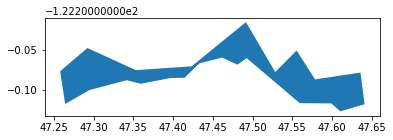

In [193]:
polygon_South_Seattle_East = Polygon(South_Seattle_East)
p = gpd.GeoSeries(polygon_South_Seattle_East)
p.plot()
plt.show()

In [194]:
p_in_South_Seattle_East_2019 = []

for p in rec19_king_numpy:
    point= Point(p[0],p[1])
    if(polygon_South_Seattle_East.contains(point)):
        p_in_South_Seattle_East_2019.append(p)


In [195]:
df19_South_Seattle_East = pd.DataFrame(np.array(p_in_South_Seattle_East_2019),columns = ['Lat','Long'])
df19_South_Seattle_East.count()

Lat     59
Long    59
dtype: int64

In [196]:
coyo19_kmeans_SeattleSE = KMeans(n_clusters=2)
coyo19_kmeans_SeattleSE.fit(df19_South_Seattle_East)

KMeans(n_clusters=2)

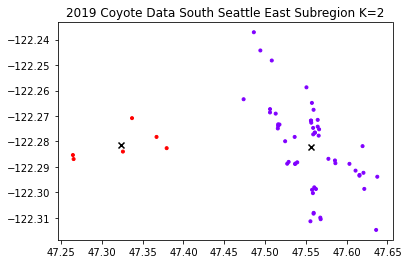

In [197]:
plt.xlim()
plt.scatter(df19_South_Seattle_East.iloc[:,0], df19_South_Seattle_East.iloc[:,1], c=coyo19_kmeans_SeattleSE.labels_, cmap='rainbow',marker='.')
#cluster centroids
plt.scatter(coyo19_kmeans_SeattleSE.cluster_centers_[:,0] ,coyo19_kmeans_SeattleSE.cluster_centers_[:,1], color='black',marker="x")
plt.title("2019 Coyote Data South Seattle East Subregion K=2")
plt.show()

In [198]:
clus_SeattleSE_2019 = df19_South_Seattle_East.copy()
clus_SeattleSE_2019['labels'] = coyo19_kmeans_SeattleSE.labels_
clus_SeattleSE_2019.to_csv('coyo19Kmeans_SeattleSE_lat_long.csv')

In [199]:
silhouette_avg_SeattleSE = silhouette_score(df19_South_Seattle_East, coyo19_kmeans_SeattleSE.labels_)
print("Seattle South East Region cluster avg silhouette_score is: ", silhouette_avg_SeattleSE)

Seattle South East Region cluster avg silhouette_score is:  0.7763473566544762


# Compare Silhouette Scores for I5 South

In [200]:
# I5 South
silhouette_avg_dt19 = silhouette_score(df19_dt_SouthSea, coyo19_kmeansdt_SouthSea.labels_)
print("Dt & South Seattle cluster avg silhouette_score is: ", silhouette_avg_dt19)

# I5 Southwest
silhouette_avg_I5SW = silhouette_score(df19_I5SW, coyo19_kmeans_I5SW.labels_)
print("South Seattle I90 Southwest cluster avg silhouette_score is: ", silhouette_avg_I5SW)

# I5 Southeast
silhouette_avg_SeattleSE = silhouette_score(df19_South_Seattle_East, coyo19_kmeans_SeattleSE.labels_)
print("Seattle South East Region cluster avg silhouette_score is: ", silhouette_avg_SeattleSE)

Dt & South Seattle cluster avg silhouette_score is:  0.4505793488652313
South Seattle I90 Southwest cluster avg silhouette_score is:  0.8048156623473427
Seattle South East Region cluster avg silhouette_score is:  0.7763473566544762
